# Assignment: Regression on the Diabetes Dataset

Here we will practice doing regression with [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).  (Throughout the following, you are welcome to add additional cells if you need them for coding.)

Execute the following cell to get us started.

In [23]:
# Import scikit-learn's example diabetes dataset
import sklearn.datasets 
diabetes = sklearn.datasets.load_diabetes()

# Print a description of the dataset
print(diabetes.DESCR)

# Get the feature and target arrays
x = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## ML steps

* `x` is now a numpy array containing 10 features and 442 records (corresponding to 442 patients).  
* `y` is a numpy array containing the target values
  * as in the description, `y` is a quantitative measure of disease progression one year after baseline.

Print the array dimensions of x and y and confirm that the dimensions match the sizes above.

In [24]:
print(x)
print(y)
##print(len(x))
##print(len(y))

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

Make scatter plots to look at the relationship between y and each feature of x

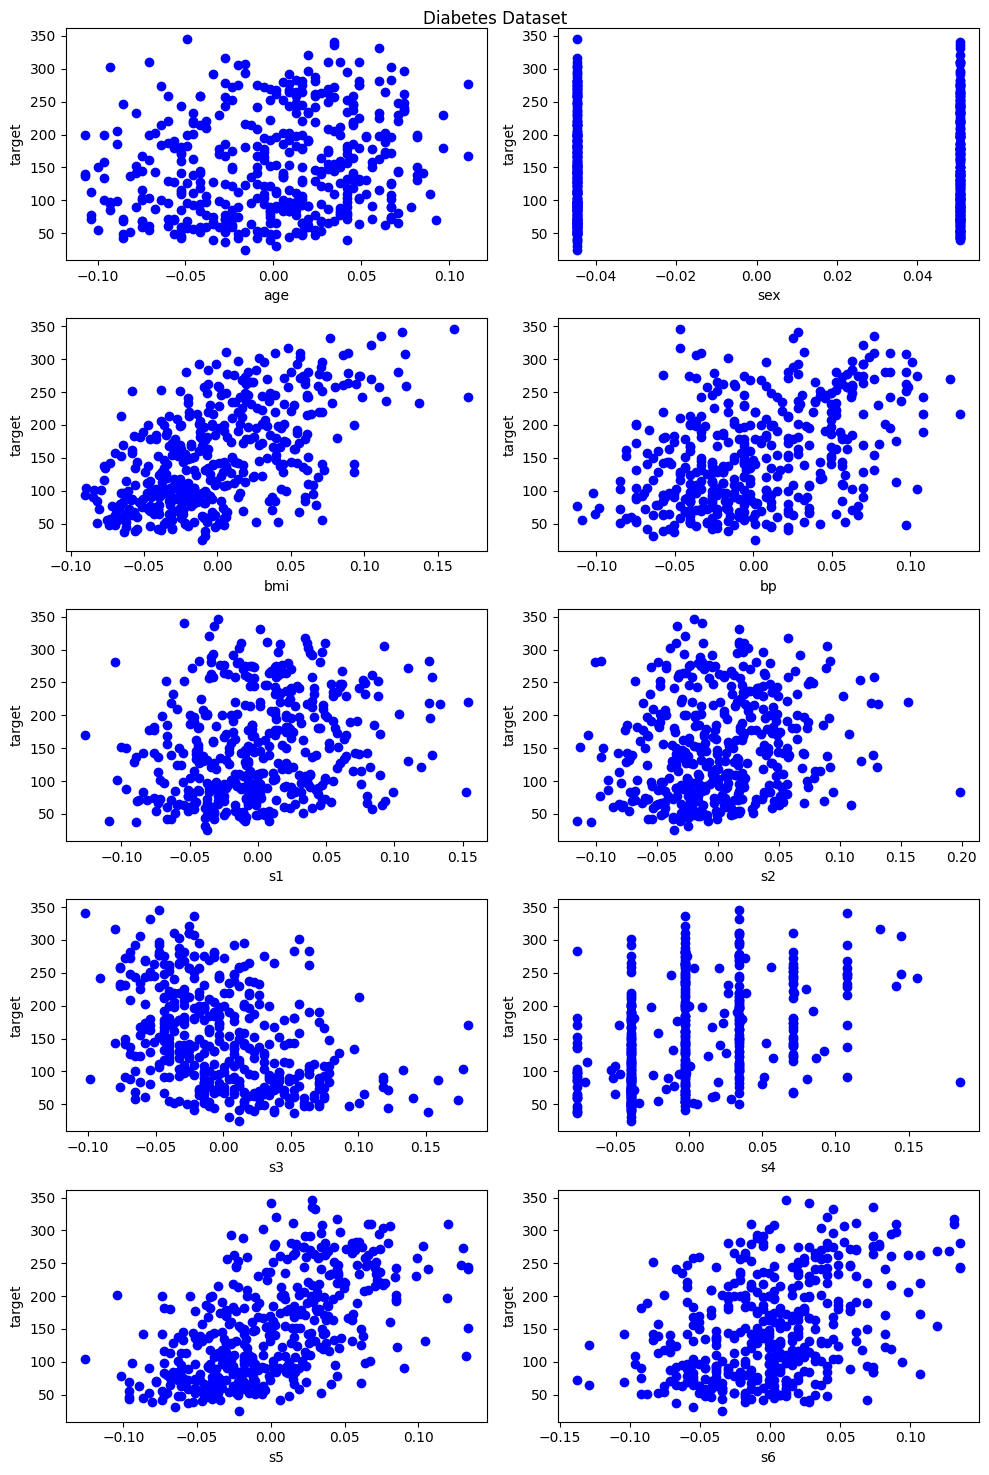

In [25]:
import matplotlib.pyplot as plt
features = diabetes.feature_names

# Plot
fig, axs = plt.subplots(5, 2, figsize=(10, 15))
fig.suptitle('Diabetes Dataset')

for i in range(5):
    for j in range(2):
        n = j + i * 2
        feature = features[n]
        axs[i, j].scatter(x[:,n],y,color='b',marker='o')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

Write a loop that prints the 10 correlation coefficients between y and the 10 features in x. 
* You may find it useful to use either [numpy's corrcoef method](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or [pandas dataframe corr method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) for calculating the correlation coefficient matrix.

In [26]:
import numpy as np
import pandas as pd

features = diabetes.feature_names
r = []
maxAttr = ""
maxR = 0
for i in range(len(features)):
  thisR = np.corrcoef(x[:,i],y)[0,1]
  print("{0}\t{1:0.2f}".format(features[i], thisR))
  if thisR > maxR:
    maxR = thisR
    maxAttr = features[i]
print("---Highest Correlation Coefficient---")
print("{0}\t{1:0.2f}".format(maxAttr,maxR))



age	0.19
sex	0.04
bmi	0.59
bp	0.44
s1	0.21
s2	0.17
s3	-0.39
s4	0.43
s5	0.57
s6	0.38
---Highest Correlation Coefficient---
bmi	0.59


Perform linear regression using the feature in x that has the highest correlation coefficient with y
* Split your data into a training set and a test set
* Train the model
* Print the coefficients of the model
* Plot the linear model as a red line on top of a scatter plot showing your training data as black circles and your test data as blue circles
* Print the mean squared error and R-squared values for your model applied to the test data

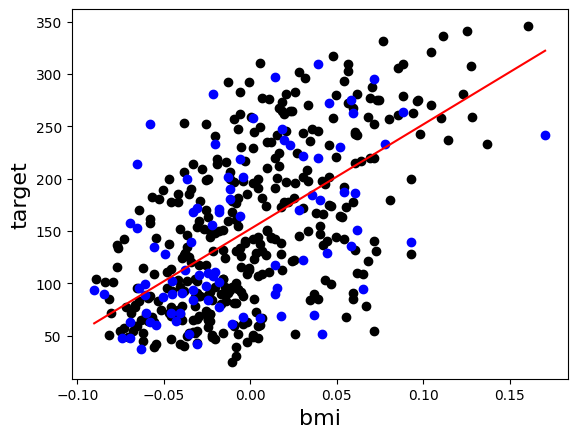

Model intercept 
 152.00

Model coefficients 
 [998.57768914]

MSE_linreg = 4061.83
R^2 = 0.23


In [27]:
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error, r2_score

xFeature = x[:,2]
maxValue = pd.Series(data=x[:,2]).max()
minValue = pd.Series(data=x[:,2]).min()

model1 = sklearn.linear_model.LinearRegression()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    xFeature, y, test_size=0.2, random_state=42)

x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model1.fit(x_train_transformed, y_train)


plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

x_model_vals = np.linspace(minValue, maxValue, 1000).reshape(-1,1)
y_model1_vals = model1.predict(x_model_vals)

plt.plot(x_model_vals,y_model1_vals,'red')
plt.ylabel('target',fontsize=16)
plt.xlabel(features[2],fontsize=16)


plt.show()

y_pred1 = model1.predict(x_test_transformed)

print("Model intercept \n {:.2f}\n".format(model1.intercept_))
print("Model coefficients \n {}\n".format(model1.coef_))
print('MSE_linreg = %.2f' % mean_squared_error(y_test, y_pred1))
print('R^2 = %.2f' % r2_score(y_test, y_pred1))

Repeat the linear regression steps, only now use all 10 features at once when doing your model fit.
* Note that when you pass any feature data like `x` into the fit method (like `fit(x,y)`), `x` is a 2D numpy array that has a size of number_of_samples by number_of_features. When training on one feature variable, `x` will have a size of number_of_samples by 1. If you train on n features, then `x` should have a size of number_of_samples by n.
* I don't expect you to plot anything this time, but print the mean squared error and R-squared values for your model applied to the test data.

In [28]:
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error

model1 = sklearn.linear_model.LinearRegression()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

x_train_transformed = x_train.reshape(-1,10)
x_test_transformed = x_test.reshape(-1,10)

model1.fit(x_train_transformed, y_train)

x_model_vals = np.linspace(-0.1, 0.2, 1000).reshape(-1,10)
y_model1_vals = model1.predict(x_model_vals)


y_pred1 = model1.predict(x_test_transformed)

print("Model intercept \n {:.2f}\n".format(model1.intercept_))
print("Model coefficients \n {}\n".format(model1.coef_))
print('MSE_linreg = %.2f' % mean_squared_error(y_test, y_pred1))
print('R^2 = %.2f' % r2_score(y_test, y_pred1))

Model intercept 
 151.35

Model coefficients 
 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]

MSE_linreg = 2900.19
R^2 = 0.45


Compare your model's results against the results obtained when training on just one feature.

Training on 10 features has performed better(higher R^2 and lower MSE) than only one feature, but we still don't know that 10 features has over-fitting issue.

Repeat the regression one more time, but now:
* Use the k-nearest neighbors algorithm rather than linear regression
* When doing so, use cross-validation to obtain the optimal number of neighbors before training your final model

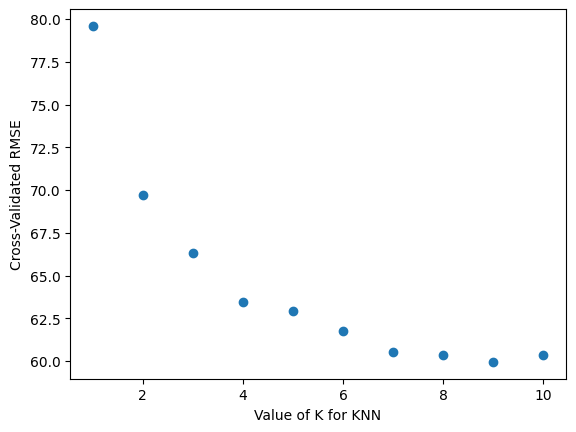

n_neighbers =1	Cross-Validated RMSE=79.60
n_neighbers =2	Cross-Validated RMSE=69.72
n_neighbers =3	Cross-Validated RMSE=66.32
n_neighbers =4	Cross-Validated RMSE=63.45
n_neighbers =5	Cross-Validated RMSE=62.93
n_neighbers =6	Cross-Validated RMSE=61.76
n_neighbers =7	Cross-Validated RMSE=60.56
n_neighbers =8	Cross-Validated RMSE=60.36
n_neighbers =9	Cross-Validated RMSE=59.95
n_neighbers =10	Cross-Validated RMSE=60.38
====Optimal K====
n_neighbers =9	Cross-Validated RMSE=59.95


In [29]:
import sklearn.neighbors
from sklearn.model_selection import cross_val_score
##use cross-validation find the optimal number of neighbors

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)
x_train_transformed = x_train.reshape(-1,10)
x_test_transformed = x_test.reshape(-1,10)

k_range = range(1, 11)
k_scores = []
for k in k_range:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train_transformed,
                           y_train, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
    k_scores.append(np.sqrt(-loss).mean())
plt.scatter(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated RMSE')
plt.show()

##print the values and get the optimal k
minK = 0
minRMSE = k_scores[0]

for i in range(10):
  print("n_neighbers ={0}\tCross-Validated RMSE={1:.2f}".format(k_range[i], k_scores[i]))
  if k_scores[i]<minRMSE:
    minRMSE = k_scores[i]
    minK = i+1
print("====Optimal K====")
print("n_neighbers ={0}\tCross-Validated RMSE={1:.2f}".format(minK, minRMSE))
    

In [30]:
##Use Optimal K to train the model
def knntest(n=1):
    model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

    x_train_transformed = x_train.reshape(-1,10)
    x_test_transformed = x_test.reshape(-1,10)

    model2.fit(x_train_transformed,
              y_train)

    y_pred2 = model2.predict(x_test_transformed)

    print('n_neighbers = {:02d}\nMSE_knn = {:.2f}'.format(n, mean_squared_error(y_test, y_pred2)))
    print('R^2 = %.2f' % r2_score(y_test, y_pred2))
knntest(9)

n_neighbers = 09
MSE_knn = 3082.94
R^2 = 0.42


Compare the MSE and R$^2$ scores of k-nearest neighbors, linear regression with the most correlated feature, and multilinear regression with all features


| _ |Parameters| MSE | R^2 |
| :-: | :-: | :-: | :-: |
| k-nearest neighbors | n_neighbers = 09 | 3082.94 | 0.42 |
| linear regression | feature = bmi | 4061.83| 0.23 |
| multi regression | all 10 features | 2900.19| 0.45 |

By comparing the Mean Squared Error (MSE) and R-squared (R^2) values, we can conclude that the **best-performing** model is the **multiple linear regression model** with all features, while the **least effective** model is the **linear regression model**.

# Submit

Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top